# Logistic Regression

This is a simple example using logistic regression to separate two groups of points in a 2d-plane.
In full-disclosure, I've followed the example of logistic regression [here](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html).

In [1]:
using Plots
using Statistics: mean

group1 = [[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]]
group2 = [[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]]

group1, group2 = hcat(group1...), hcat(group2...);

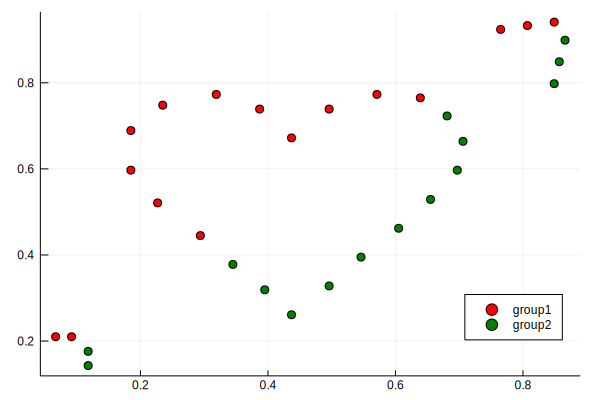

In [2]:
plot(group1[1, :], group1[2, :], seriestype=:scatter, color = :red, label="group1", legend=:bottomright)
plot!(group2[1, :], group2[2, :], seriestype=:scatter, color = :green, label="group2")

In [3]:
"""
   logistic(X, W)

   this performs a dot product between W (1 x m) and  X (m x n) then the 
   elementwise logistic function.  Note Julia is a column major language.
"""
function logistic(X, W)
    reshape(1. ./ (1. .+ exp.(-(W * X))), :)
end


"""
   crossentropy(yhat, y)

   calculating the loss to make sure that our loss is going down during 
   gradient descent.  This is the log of the likelihood.  We use the log 
   for numerical stability reasons.
"""
function crossentropy(yhat, y)
    -mean(y .* log.(yhat) .+ (1. .- y) .* log.(1. .- yhat))
end

"""
    calcgrad(X, yhat, y, lr=0.01)

    calculate the gradient of the loss.  This is the first derivative of the 
    crossentropy loss with respect to the weight matrix.
"""
function calcgrad(X, yhat, y, lr=0.01)
    N = size(yhat)[1]
    gradients = X * (yhat .- y)
    gradients /= N
    gradients *= lr
    reshape(gradients, 1, :)
end

"""
    This is the likelihood function, but I didn't use it because we are 
    maximizing the log likelihood, which is equivalent to minimizing the 
    likelihood function.
"""
function liklihood(W, X, y)
    h = logistic(X, W)
    (h).^y .* (1. .- h).^(1. .- y)
end

liklihood

## Gradient Descent

![Gradient Descent](https://media.giphy.com/media/6QlTwkigqg4yk/200w_d.gif)

We are optimizing the weight matrix using gradient descent.  This is a process that calculates 
the weights contribution to the difference between the probability of the binary prediction and 
the actual label.  Upon each iteration we do the following steps:

  1. Calculate the probability of the binary class
  2. Calculate the gradient of the cost with respect to the weights
  3. Adjust our weights by the gradient times a learning rate
  4. Repeat
  
There are also a few checks for reporting the loss and some early stopping criteria

In [4]:
n1, n2 = size(group1)[end], size(group2)[end]
data = hcat(vcat(ones(1, n1), group1), vcat(ones(1, n2), group2))
labels = vcat(ones(n1), zeros(n2))
W = reshape(rand(3), 1, :) # bias, feature 1, feature 2

@show size(W), size(data), size(labels)
i = 1
while true
    i += 1
    probs = logistic(data, W)
    yhat = ifelse.(probs .> .5, 1., 0.)
    grads = calcgrad(data, probs, labels)
    if i % 1000 == 0
        @show W
        @show crossentropy(probs, labels), grads
    end
    if sum(abs.(grads)) < 5e-6
        @show W
        @show crossentropy(probs, labels), grads
        break
    end
    W -= grads
    if i == 10000
        break
    end
end

(size(W), size(data), size(labels)) = ((1, 3), (3, 31), (31,))
W = [-0.27204 -0.259733 0.809591]
(crossentropy(probs, labels), grads) = (0.6525615195726835, [3.31738e-5 0.000429561 -0.000304735])
W = [-0.278616 -0.66096 1.12813]
(crossentropy(probs, labels), grads) = (0.6262892075028075, [7.44324e-7 0.000384141 -0.000319251])
W = [-0.281576 -1.03322 1.4428]
(crossentropy(probs, labels), grads) = (0.6025239108151296, [5.36062e-6 0.000360938 -0.000309841])
W = [-0.289121 -1.38367 1.74775]
(crossentropy(probs, labels), grads) = (0.5809338456462362, [9.57367e-6 0.000340277 -0.000300062])
W = [-0.300418 -1.71446 2.04299]
(crossentropy(probs, labels), grads) = (0.5612588056021438, [1.28853e-5 0.000321605 -0.000290438])
W = [-0.314637 -2.02749 2.32871]
(crossentropy(probs, labels), grads) = (0.5432729584883755, [1.54407e-5 0.000304723 -0.000281051])
W = [-0.33109 -2.32446 2.60519]
(crossentropy(probs, labels), grads) = (0.5267805392179963, [1.7374e-5 0.000289445 -0.000271954])
W = [-0.349214 

Weights: [-0.388742 -3.13357 3.38262]


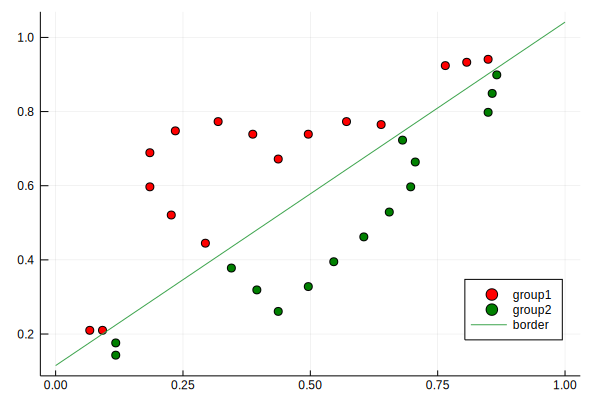

In [5]:
"""
    linear(X, W)
    
    given X = [1., x_1, x_2], we want to draw the separator line across the 
    span of our graph (roughly the interval [0, 1]).  We can transform the formula 
    y = mx + b to:
    y = w_2 * x_1 + w_3 * x_2 + w_1 * 1. to:
    x_2 = (w_2 * x_1 + w_1) / -w_3
"""
function linear(X, W)
    # y = mx + b --- (W[1] + border_input * W[2]) / W[3] = y
    # y = w_1 + w_2 * x_1 + w_3 * x_2 -> x_2 = (w_1 + w_2 * x_1 - y) / -w_3
    (W[1] .+ W[2] .* X) ./ -W[3]
end

border_x = 0.01 .* (0:100)
border_y = linear(border_x, W)

println("Weights: ", W)
plot(group1[1, :], group1[2, :], seriestype=:scatter, color = :red, label="group1", legend=:bottomright)
plot!(group2[1, :], group2[2, :], seriestype=:scatter, color = :green, label="group2")
plot!(border_x, border_y, label="border")

# Distribution of Points

We can also visualize the probability of each point with respect to the border.  We clearly 
see a clean separation between the two groups.

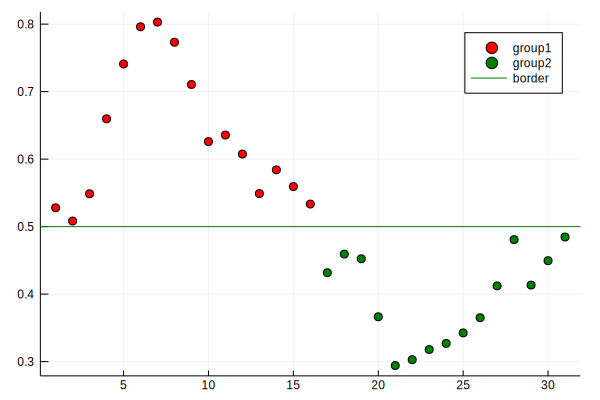

In [6]:
probs = logistic(data, W)
plot(1:n1, probs[1:n1], seriestype=:scatter, color = :red, label="group1")
plot!(n1+1:length(probs), probs[n1+1:end], seriestype=:scatter, color = :green, label="group2")
hline!([.5], color = :green, label="border")

# Conclusion

A heart divided?  The thin line between love and hate?  All you need is love?  I'll leave you to choose which cheesy saying you want to go with.  As I've shown above, the data is easily separable with a logistic regression classifier.  One of the improvements that I could have make is to add weight regularization.  The current model suffers from the weights exploding because the final equal relies on a ratio of the weights between the two features in each point.  To combat this, I could use [weight regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) in my model.  The most commonly used regularizers are L1 (ridge) or L2 (lasso) regularizer and a common use of an L1 regularizer is as a feature selector.  Ah, but of course, I have not answered the question

```
"determine an equation for a linear separator for these two groups of points"
```

Given weights of `[-0.388722 -3.13332 3.38237]` and a vector of `1s` concatenated to the coordinates the equation for the linear separator is:

$${\displaystyle y={\begin{cases}1& dot(W, X) > .5\\0&{\text{else}}\end{cases}}}$$

I chose to use Julia because I like learning new things.  I felt like this was a simple enough project that I could use it to experiment with something new.  If I were going for a more performant model I could have used sklearn in a few lines of code like so:

```python
import numpy as np
from sklearn.linear_model import LogisticRegression

group1 = np.array(...)
group2 = np.array(...)
data = np.r_[group1, group2]
labels = np.r_[np.ones(group1.shape[0]), np.zeros(group2.shape[0])]
model = LogisticRegression().fit(data, labels)
model.coef_, model.intercept_
```

Lastly, I chose logistic regression because I think people like to see gradient descent in a non-neural network setting.  I also thought about using a k-nearest neighbors (KNN) or support vector machine (SVM).  But surprisingly, I read a KNN is not a linear classifier and writing the equation for an SVM is quite difficult.  